# Importing all the required libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.patches import FancyBboxPatch
import mplcursors as mpc

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
# plt.rcParams["figure.figsize"] = (16,10)
# plt.rcParams = {"figure.figsize": (16,10), "xticks.labelsize": 14, "yticks.labelsize": 14, 
#                 "xlabel.labelsize": 16, "ylabel.labelsize": 16,'figure.max_open_warning': 0}

In [22]:
df = pd.read_csv('anime.csv')

In [23]:
df.shape

(17562, 35)

In [24]:
df.head()

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0


In [25]:
df.columns

Index(['MAL_ID', 'Name', 'Score', 'Genres', 'English name', 'Japanese name',
       'Type', 'Episodes', 'Aired', 'Premiered', 'Producers', 'Licensors',
       'Studios', 'Source', 'Duration', 'Rating', 'Ranked', 'Popularity',
       'Members', 'Favorites', 'Watching', 'Completed', 'On-Hold', 'Dropped',
       'Plan to Watch', 'Score-10', 'Score-9', 'Score-8', 'Score-7', 'Score-6',
       'Score-5', 'Score-4', 'Score-3', 'Score-2', 'Score-1'],
      dtype='object')

# <br>

# Data cleaning

In [26]:
df.isnull().sum().to_frame()

,0
MAL_ID,0
Name,0
Score,0
Genres,0
English name,0
Japanese name,0
Type,0
Episodes,0
Aired,0
Premiered,0


In [27]:
df.duplicated().sum()

0

# <br>

# EDA

### Top 10 animes by how high they are rated

In [28]:
ratings = df[df['Score'] != 'Unknown']
sorted_ratings = ratings.sort_values('Score', ascending = False).head(10).reset_index()
sorted_ratings.Score = sorted_ratings.Score.astype(float)

sorted_ratings.head()

,index,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,3971,5114,Fullmetal Alchemist: Brotherhood,9.19,"Action, Military, Adventure, Comedy, Drama, Ma...",Fullmetal Alchemist:Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,TV,64,"Apr 5, 2009 to Jul 4, 2010",...,714811.0,401507.0,199160.0,70045.0,20210.0,9308.0,3222.0,1536.0,2162.0,16806.0
1,15926,40028,Shingeki no Kyojin: The Final Season,9.17,"Action, Military, Mystery, Super Power, Drama,...",Attack on Titan Final Season,進撃の巨人 The Final Season,TV,16,"Dec 7, 2020 to ?",...,173154.0,63756.0,26016.0,8793.0,2674.0,1336.0,588.0,382.0,514.0,11061.0
2,5683,9253,Steins;Gate,9.11,"Thriller, Sci-Fi",Steins;Gate,STEINS;GATE,TV,24,"Apr 6, 2011 to Sep 14, 2011",...,468504.0,275960.0,140914.0,57740.0,21375.0,11126.0,5061.0,2292.0,1678.0,5255.0
3,14963,38524,Shingeki no Kyojin Season 3 Part 2,9.10,"Action, Drama, Fantasy, Military, Mystery, Sho...",Attack on Titan Season 3 Part 2,進撃の巨人 Season3 Part.2,TV,10,"Apr 29, 2019 to Jul 1, 2019",...,327290.0,239451.0,110481.0,33662.0,8365.0,2974.0,1108.0,550.0,385.0,4169.0
4,9913,28977,Gintama°,9.10,"Action, Comedy, Historical, Parody, Samurai, S...",Gintama Season 4,銀魂°,TV,51,"Apr 8, 2015 to Mar 30, 2016",...,78918.0,37902.0,21360.0,10215.0,3898.0,2311.0,952.0,648.0,1100.0,4508.0


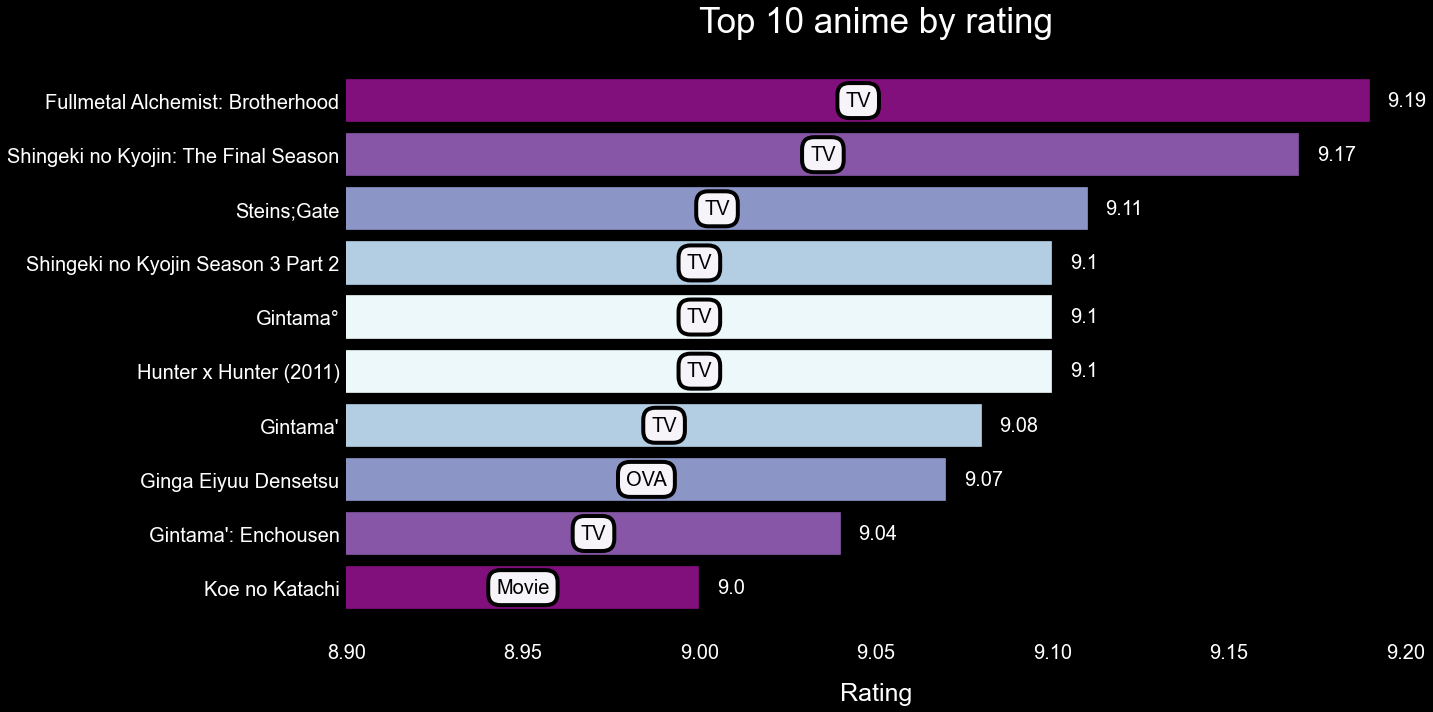

In [29]:
colors = ['#edf8fb','#b3cde3','#8c96c6','#8856a7','#810f7c']
colors = list(sorted(colors)) + list(sorted(colors, reverse = True))

#shapes 
# rectangle = plt.Rectangle((8.92, 1), 0.05, 0.8, zorder = 5, bbox = dict(pad = 0.3))

plt.style.use(['seaborn','dark_background'])
plt.figure(figsize = (20,10))
# ax = plt.gca()
# ax.add_patch(rectangle)

x = plt.barh(sorted_ratings['Name'],sorted_ratings['Score'], edgecolor = 'k', color = colors)
for i in range(10):
    plt.text((8.90 + sorted_ratings['Score'][i])/2, i, sorted_ratings.Type[i], color = 'k',
             bbox = dict(facecolor = '#f7f4f9', edgecolor = 'k', linewidth = 4,
                        boxstyle = "round, pad = 0.4, rounding_size = 0.6"), 
             fontsize = 20, verticalalignment = 'center', horizontalalignment = 'center')
    plt.text(x = sorted_ratings['Score'][i] + 0.005, y = i, s = sorted_ratings['Score'][i], 
             color = 'white', verticalalignment = 'center', fontsize = 20)

plt.title('Top 10 anime by rating', size = 35, pad = 20)  
plt.xlabel('Rating', size = 25, labelpad = 20)
plt.xlim(8.9, 9.2)
plt.grid(visible = False)
plt.xticks(size = 20)
plt.yticks(size = 20)

plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

#### Conclusion
The highest rated anime is <u>Fullmetal Alchemist: Brotherhood</u> followed by 
<u>Shingeki no Kyojin: The Final Season</u> also commonly known as <u>Attack on Titan</u> and 
<u>Stein's gate</u>
<br><br>
We can also see a relation between type and rating, like how most of the top rated animes are of type TV ie. released as TV shows

### <br>

### Type of anime

In [30]:
df.Type.value_counts()

TV         4996
OVA        3894
Movie      3041
Special    2218
ONA        1907
Music      1469
Unknown      37
Name: Type, dtype: int64

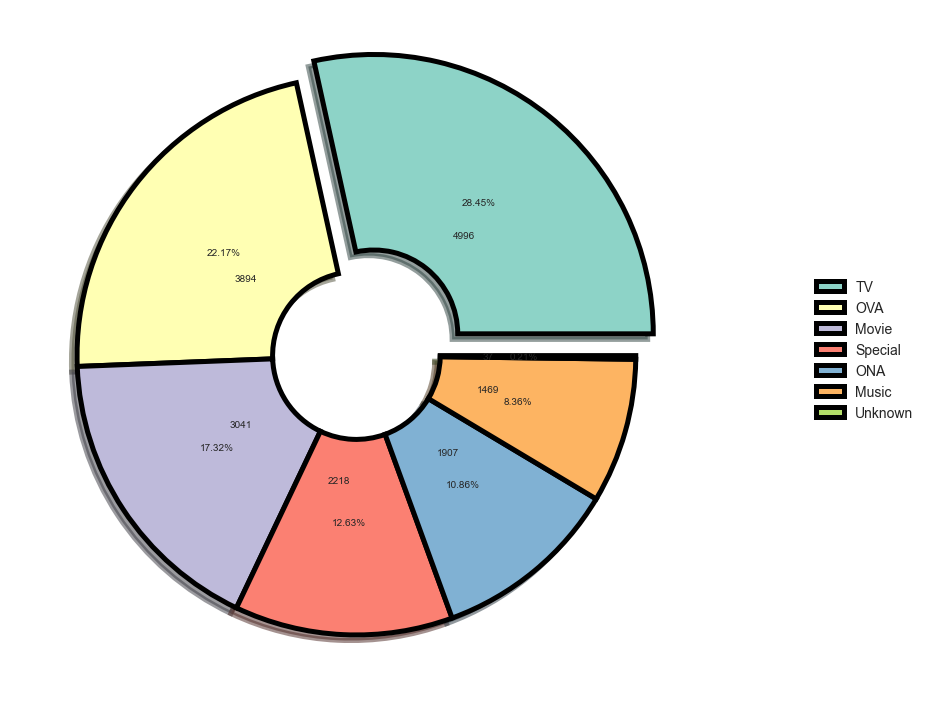

In [32]:
plt.figure(figsize = (16,10))
plt.style.use(['seaborn'])

color = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462','#b3de69']

plt.pie(df.Type.value_counts(), radius = 1, colors = color, shadow = True, 
        labels = df.Type.value_counts(), autopct = '%.2f%%', explode = [0.1, 0, 0, 0, 0, 0, 0],
        labeldistance = 0.45,
        wedgeprops = {"edgecolor" : "black", 'linewidth': 5, 'antialiased': True, 'width': 0.7})

plt.legend(labels = df.Type.value_counts().index, fontsize = 14, loc = (1.15, 0.4))

plt.tight_layout()
plt.show()

From this pie we can come to the conclusion that most anime are <b>TV shows</b> closely followed by <b>OVA</b>

### <br>

## Total shows by rating

In [35]:
ratings.head(3)

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0


In [36]:
ratings.Score = ratings.Score.astype(float)

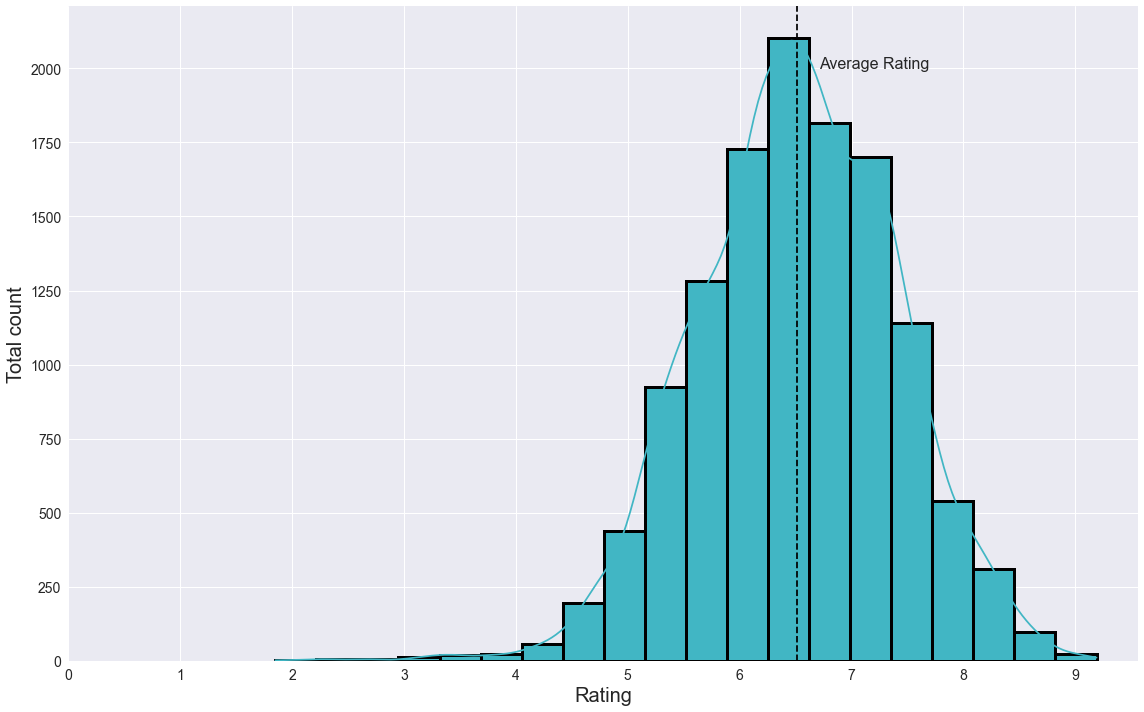

In [37]:
plt.style.use('seaborn')
plt.figure(figsize = (16,10))

sns.histplot(ratings.Score, kde = True, bins = 20, alpha = 1, color = '#41b6c4', edgecolor = 'k',
            linewidth = 3)
plt.axvline(np.mean(ratings.Score), color = 'k', ls = '--')
plt.text(np.mean(ratings.Score) + 0.2, 2000, 'Average Rating', fontsize = 16)

plt.xticks(np.arange(10), size = 14)
plt.yticks(size = 14)
plt.xlabel('Rating', size =20)
plt.ylabel('Total count', size =20)

plt.tight_layout()
plt.show()

 From this graph we can see that most of the shows are rated around 6.5

### <br>

## Most popular genre in top 100 anime(sorted by rating)

In [38]:
top100 = ratings.sort_values('Score', ascending = False).head(100).reset_index()
top100.head(3)

,index,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,3971,5114,Fullmetal Alchemist: Brotherhood,9.19,"Action, Military, Adventure, Comedy, Drama, Ma...",Fullmetal Alchemist:Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,TV,64,"Apr 5, 2009 to Jul 4, 2010",...,714811.0,401507.0,199160.0,70045.0,20210.0,9308.0,3222.0,1536.0,2162.0,16806.0
1,15926,40028,Shingeki no Kyojin: The Final Season,9.17,"Action, Military, Mystery, Super Power, Drama,...",Attack on Titan Final Season,進撃の巨人 The Final Season,TV,16,"Dec 7, 2020 to ?",...,173154.0,63756.0,26016.0,8793.0,2674.0,1336.0,588.0,382.0,514.0,11061.0
2,5683,9253,Steins;Gate,9.11,"Thriller, Sci-Fi",Steins;Gate,STEINS;GATE,TV,24,"Apr 6, 2011 to Sep 14, 2011",...,468504.0,275960.0,140914.0,57740.0,21375.0,11126.0,5061.0,2292.0,1678.0,5255.0


In [39]:
top100.Genres[1].split(', ')

['Action', 'Military', 'Mystery', 'Super Power', 'Drama', 'Fantasy', 'Shounen']

In [40]:
dict1 = {}
for i in range(100):
    for i in top100.Genres[i].split(', '):
        if i in list(dict1.keys()):
            dict1[i] += 1
        else:
            dict1[i] = 1

In [41]:
genre_total = pd.DataFrame(dict1, index = np.arange(1)).transpose().reset_index()
genre_total.columns = ['Genre', 'Total']
genre_total = genre_total.sort_values('Total', ascending = False).reset_index(drop = True)
genre_total

,Genre,Total
0,Drama,51
1,Comedy,42
2,Action,41
3,Shounen,41
4,Supernatural,31
5,Sci-Fi,27
6,Fantasy,24
7,Slice of Life,24
8,Historical,24
9,Mystery,21


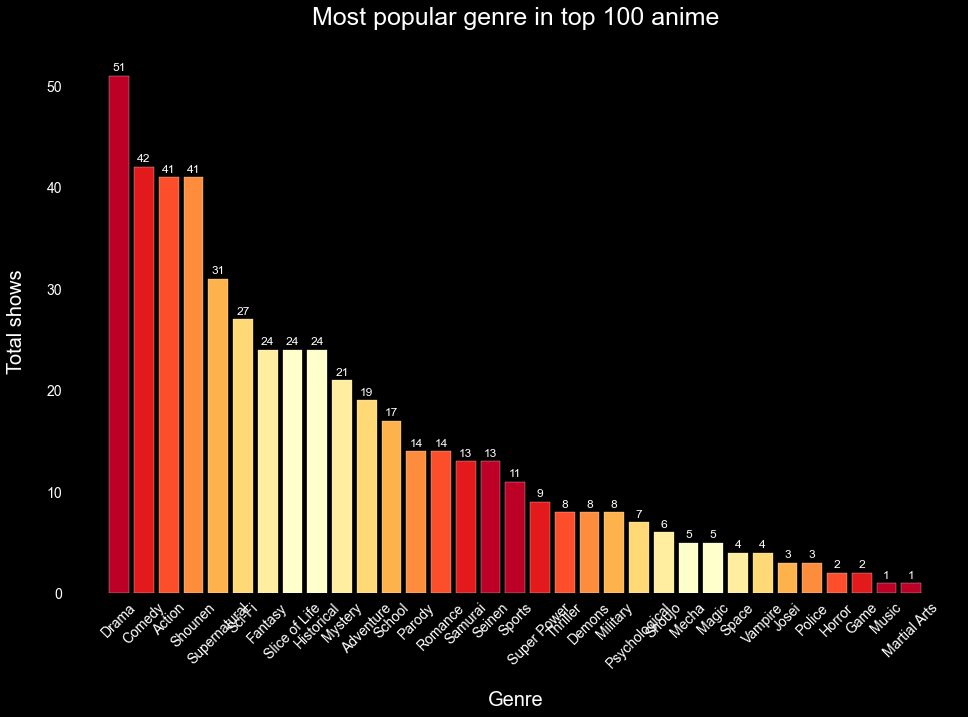

In [44]:
colors = ['#ffffcc','#ffeda0','#fed976','#feb24c','#fd8d3c','#fc4e2a','#e31a1c','#bd0026']
colors = list(reversed(colors)) + colors 

plt.style.use('dark_background')
plt.figure(figsize = (16,10))

plt.bar(genre_total.Genre, genre_total.Total, color = colors, edgecolor = 'white')
for i in range(len(dict1)):
    plt.text(i, genre_total.Total[i]+0.5, genre_total.Total[i], horizontalalignment = 'center', 
             size = 12)

plt.title('Most popular genre in top 100 anime', size = 25, pad = 25)
plt.xlabel('Genre', fontsize = 20, labelpad = 20)
plt.ylabel('Total shows', fontsize = 20, labelpad = 20)
plt.xticks(rotation = 45, horizontalalignment = 'center', size = 14)
plt.yticks(size = 14)
plt.grid([])

# plt.tight_layout()
plt.show()

From the above graph we can see that the most common genre in top rated animes is <b>Drama genre</b> followed by the <b>Comedy genre</b> and the <b>Action genre</b>

### <br>

## Total anime by age rating

In [45]:
Age_rating = df['Rating'].value_counts().to_frame().reset_index()
Age_rating.columns = ['Rating', 'Total']
Age_rating

,Rating,Total
0,PG-13 - Teens 13 or older,6132
1,G - All Ages,5782
2,PG - Children,1461
3,Rx - Hentai,1345
4,R - 17+ (violence & profanity),1157
5,R+ - Mild Nudity,997
6,Unknown,688


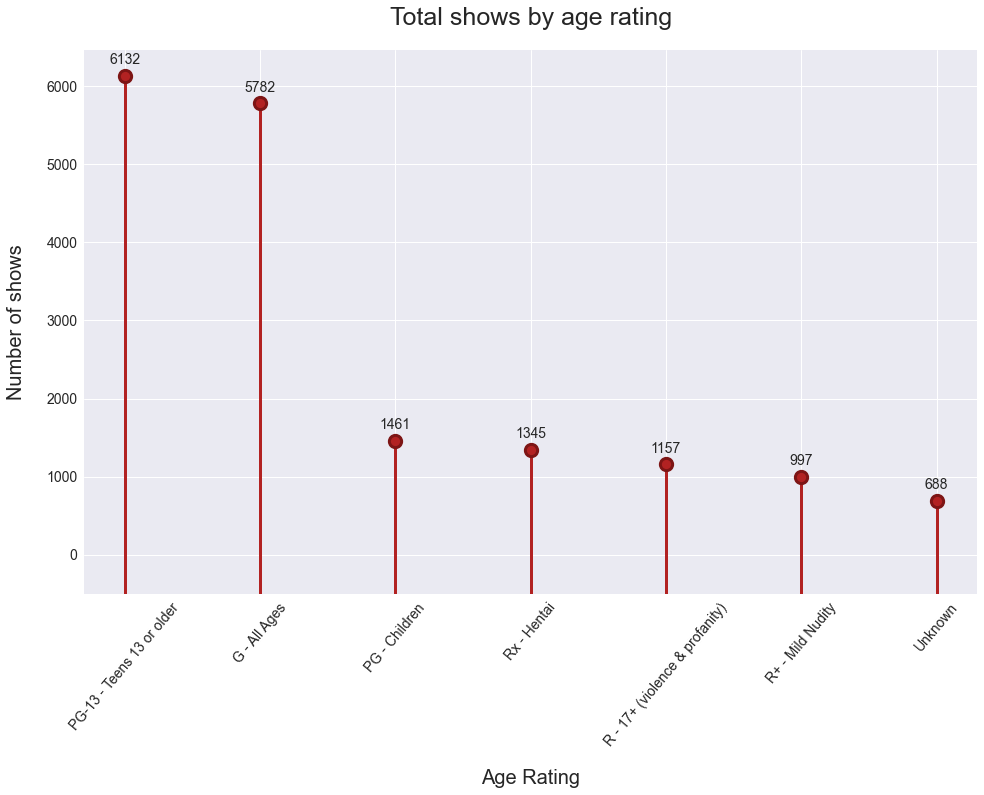

In [48]:
plt.figure(figsize = (16,10))
plt.style.use('seaborn')

plt.scatter(Age_rating.Rating, Age_rating.Total, edgecolor = '#7d1515', color = 'firebrick', s = 150, 
            linewidth = 3, zorder = 5)
for i in range(Age_rating.shape[0]):
    plt.vlines(i, -500, Age_rating.Total[i], color = 'firebrick', linewidth = 3)
    plt.text(i, Age_rating.Total[i]+200, Age_rating.Total[i], verticalalignment = 'center', 
             horizontalalignment = 'center', fontsize = 14)

plt.ylim(-500)
plt.xticks(size = 14, rotation = 50)
plt.yticks(size = 14)
plt.xlabel('Age Rating', size = 20, labelpad = 20)
plt.ylabel('Number of shows', size = 20, labelpad = 20)
plt.title('Total shows by age rating', size = 25, pad = 25)

plt.show()

From this graph we can observe that most shows are <b>PG-13 rated</b> very closely followed by <b>G rated</b>

<br>

In [49]:
grouped_rating = df.groupby(['Rating', 'Type'])['Type'].count().to_frame()
grouped_rating.columns = ['Total']
grouped_rating.reset_index(inplace =True)
grouped_rating.Total = grouped_rating.Total.astype(int)
average = np.mean(grouped_rating.Total)

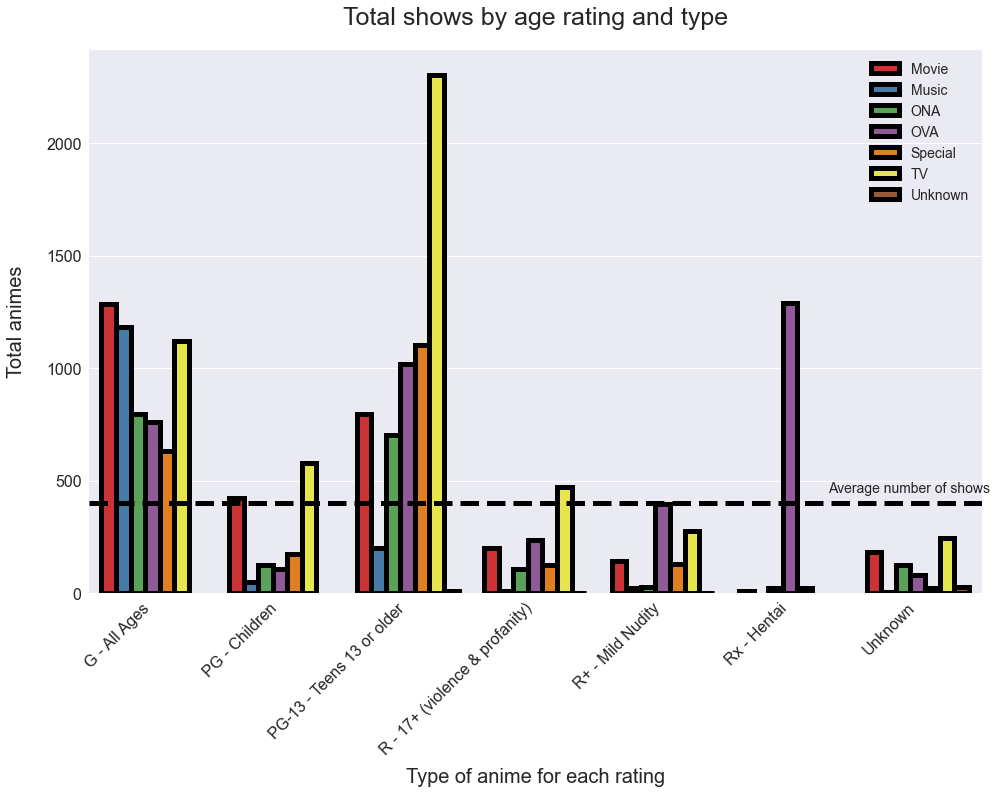

In [50]:
colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#ffff33','#a65628']

plt.figure(figsize = (16,10))

sns.barplot(grouped_rating.Rating, grouped_rating.Total,hue = grouped_rating.Type, palette = colors, 
            edgecolor = 'k', linewidth = 5)
plt.axhline(average, c = 'k', linewidth = 5, ls = '--')
plt.text(5.3, average+50, 'Average number of shows', fontsize = 14)

plt.xticks(fontsize = 16, rotation = 45, horizontalalignment = 'right')
plt.yticks(fontsize = 16)
plt.legend(fontsize = 14)
plt.title('Total shows by age rating and type', size = 25, pad = 25)
plt.xlabel('Type of anime for each rating', size = 20, labelpad = 10)
plt.ylabel('Total animes', size = 20, labelpad = 20)

plt.show()

From this graph we can come to conclusion that most PG-13 rated animes are TV Shows where-as the next closely following bar G Rated bar from previous graph mostly comprises of Movies and Music followed by TV shows

## <br>

## Total number of anime released per year

In [51]:
aired = df[df['Aired'] != 'Unknown'][['Name', 'Aired']]
aired

,Name,Aired
0,Cowboy Bebop,"Apr 3, 1998 to Apr 24, 1999"
1,Cowboy Bebop: Tengoku no Tobira,"Sep 1, 2001"
2,Trigun,"Apr 1, 1998 to Sep 30, 1998"
3,Witch Hunter Robin,"Jul 2, 2002 to Dec 24, 2002"
4,Bouken Ou Beet,"Sep 30, 2004 to Sep 29, 2005"
...,...,...
17556,Wan Jie Shen Zhu 3rd Season,"Mar 17, 2021 to ?"
17557,Daomu Biji Zhi Qinling Shen Shu,"Apr 4, 2021 to ?"
17558,Mieruko-chan,2021 to ?
17559,Higurashi no Naku Koro ni Sotsu,"Jul, 2021 to ?"


In [52]:
# function to extract the first appearance of a year in the aired column giving us the start year
def get_year(text):
    for i in range(0,len(text)):
        temp = text[i:i+5].strip()
        try:
            return int(temp)
        except:
            continue

# testing with an input 
get_year('Jul 2, 2002 to Dec 24, 2002')

2002

In [53]:
aired['Start_year'] = aired.Aired.apply(get_year)
aired.head()

,Name,Aired,Start_year
0,Cowboy Bebop,"Apr 3, 1998 to Apr 24, 1999",1998
1,Cowboy Bebop: Tengoku no Tobira,"Sep 1, 2001",2001
2,Trigun,"Apr 1, 1998 to Sep 30, 1998",1998
3,Witch Hunter Robin,"Jul 2, 2002 to Dec 24, 2002",2002
4,Bouken Ou Beet,"Sep 30, 2004 to Sep 29, 2005",2004


In [54]:
sorted_year = aired.Start_year.value_counts().to_frame().reset_index()
sorted_year.columns = ['Year', 'Total']
sorted_year.sort_values('Year',inplace = True)
sorted_year

,Year,Total
61,1917,16
74,1918,7
91,1924,3
78,1925,6
76,1926,6
...,...,...
2,2018,882
5,2019,730
9,2020,603
20,2021,307


In [55]:
sorted_year[sorted_year['Total'] == 922]

,Year,Total
0,2017,922


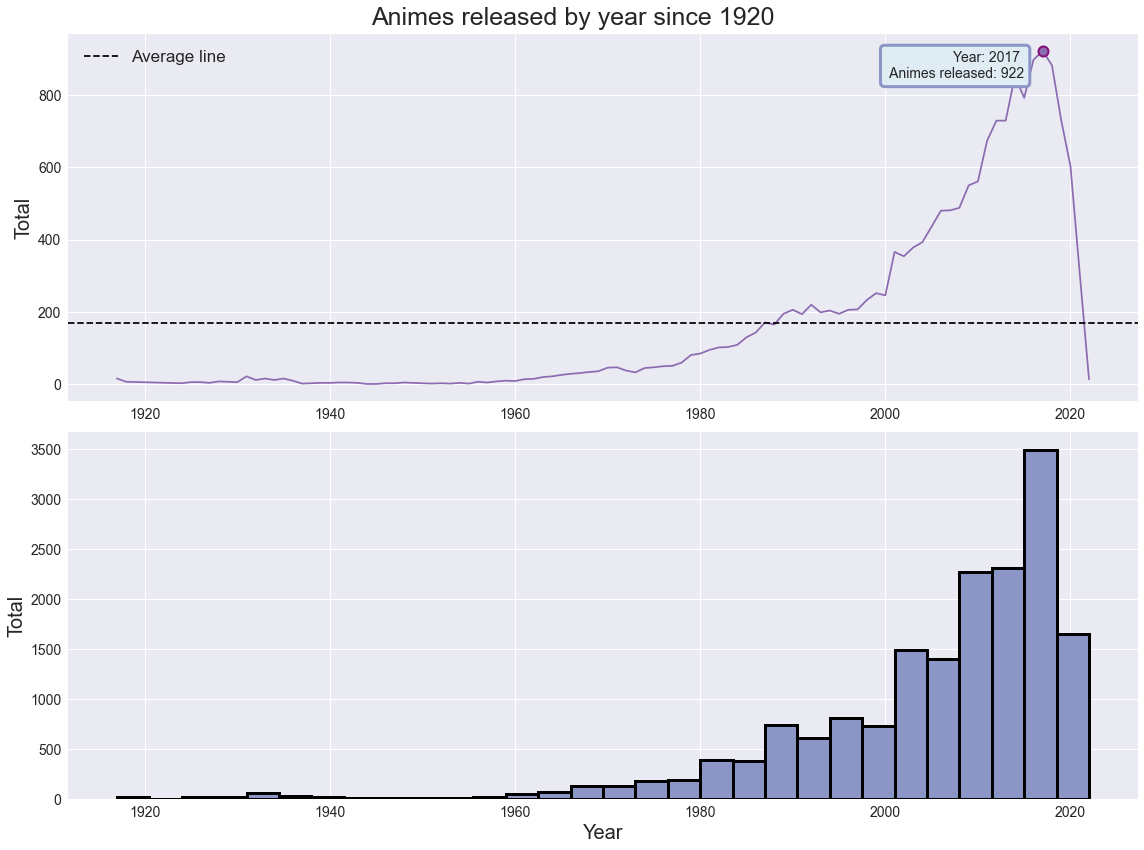

In [56]:
# circle = plt.Circle((2017,922), 20)
color = ['#ffffcc','#d9f0a3','#addd8e','#78c679','#31a354','#006837']

plt.style.use('seaborn')
plt.figure(figsize = (16,12))
plt.suptitle('Animes released by year since 1920', size = 25)

ax1 = plt.subplot(211)
ax1.plot(sorted_year.Year, sorted_year.Total, c  = '#8c6bb1')
ax1.scatter(2017, 922, s = 100, edgecolor = '#810f7c', facecolor = '#8c6bb1', linewidth = 2, zorder = 5)
ax1.text(2015, 922, 'Year: 2017 \n Animes released: 922', size = 14, verticalalignment = 'top', 
         horizontalalignment = 'right', 
         bbox = dict(pad = 5, facecolor = '#e0ecf4', edgecolor = '#8c96c6', linewidth = 3, 
                     boxstyle = ("round, pad = 0.4,rounding_size = 0.3")))
ax1.axhline(np.mean(sorted_year.Total), color = 'k', ls = '--', label = 'Average line')

ax1.tick_params(axis = 'both', labelsize = 14)
ax1.legend(fontsize = 17)
ax1.set_ylabel('Total', size = 20)
# ax1.add_patch(circle)


ax2 = plt.subplot(212)
sns.histplot(aired.Start_year, bins = 30, edgecolor = 'k', linewidth = '3', alpha = 1, color = '#8c96c6', ax = ax2)

ax2.set_xlabel('Year', size = 20)
ax2.set_ylabel('Total', size = 20)
ax2.tick_params(axis = 'both', labelsize = 14)
# plt.x

plt.tight_layout()
plt.show()



There is a sudden spike in new animes being aired from the start of this century... ie. Since 2000
and the graph has only gone up since then, ie. till 2017... at the all time high after which there is a huge decrease... 
<br>
<br>
I am not sure what the reason is... maybe the data is incomplete...

check the duration of anime to see if long animes are dropped often

## Time series analysis by type of anime

In [58]:
aired['Type'] = df.Type
aired

,Name,Aired,Start_year,Type
0,Cowboy Bebop,"Apr 3, 1998 to Apr 24, 1999",1998,TV
1,Cowboy Bebop: Tengoku no Tobira,"Sep 1, 2001",2001,Movie
2,Trigun,"Apr 1, 1998 to Sep 30, 1998",1998,TV
3,Witch Hunter Robin,"Jul 2, 2002 to Dec 24, 2002",2002,TV
4,Bouken Ou Beet,"Sep 30, 2004 to Sep 29, 2005",2004,TV
...,...,...,...,...
17556,Wan Jie Shen Zhu 3rd Season,"Mar 17, 2021 to ?",2021,ONA
17557,Daomu Biji Zhi Qinling Shen Shu,"Apr 4, 2021 to ?",2021,ONA
17558,Mieruko-chan,2021 to ?,2021,TV
17559,Higurashi no Naku Koro ni Sotsu,"Jul, 2021 to ?",2021,TV


In [59]:
grp_tsa = aired.groupby(['Start_year','Type']).count().reset_index()
grp_tsa

,Start_year,Type,Name,Aired
0,1917,Movie,16,16
1,1918,Movie,7,7
2,1924,Movie,3,3
3,1925,Movie,6,6
4,1926,Movie,6,6
...,...,...,...,...
355,2022,Movie,2,2
356,2022,ONA,1,1
357,2022,OVA,1,1
358,2022,TV,6,6


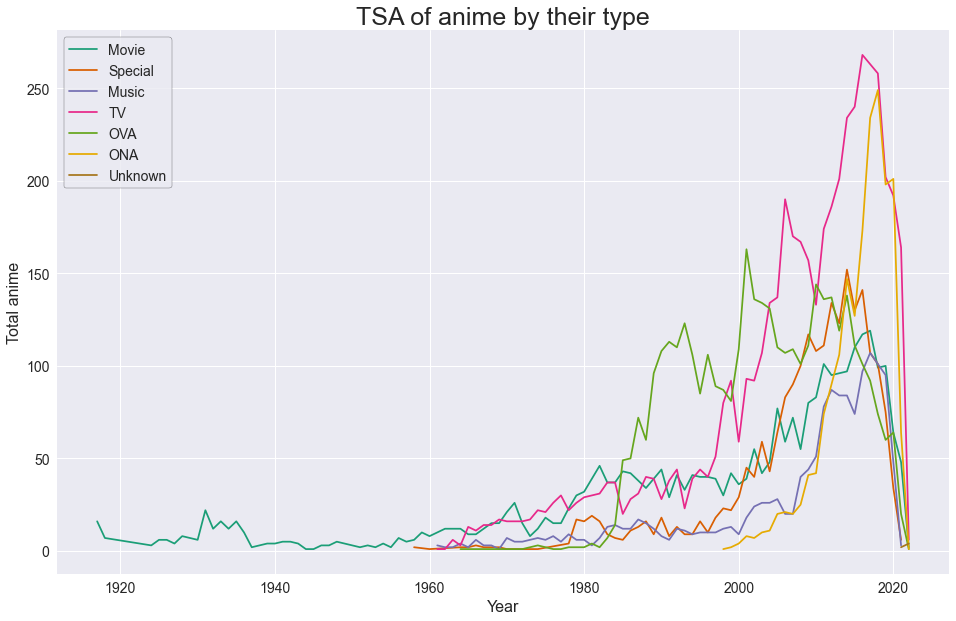

In [63]:
colors = ['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02','#a6761d']

plt.figure(figsize = (16,10))

sns.lineplot(grp_tsa.Start_year, grp_tsa.Aired, hue = grp_tsa.Type, palette = colors)

plt.legend(fontsize = 14, frameon = True, edgecolor= 'k')
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.xlabel("Year",size = 16)
plt.ylabel("Total anime", size = 16)
plt.title('TSA of anime by their type', size = 25)


plt.show()




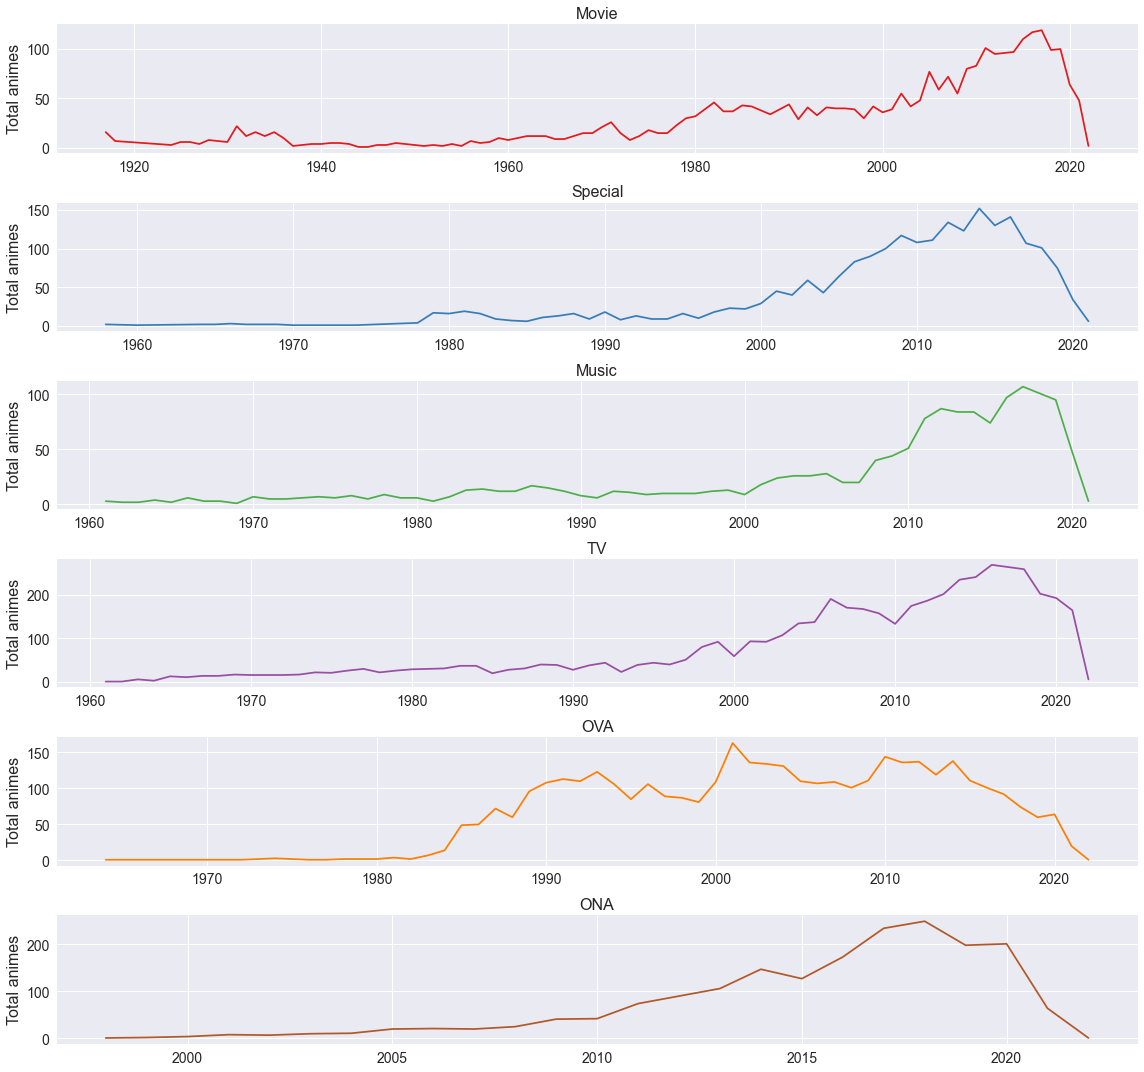

In [121]:
colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#b15928']

fig, ax = plt.subplots(6,1, figsize = (16,15))
for i in range(6):
    ax[i].plot('Start_year','Name', data = grp_tsa[grp_tsa['Type'] == grp_tsa.Type.unique()[i]],
               c = colors[i])
    ax[i].set_ylabel('Total animes', size = 16)
    ax[i].set_title(grp_tsa.Type.unique()[i], size = 16)
    ax[i].tick_params(axis = 'both', labelsize = 14)
plt.tight_layout()